In [1]:
cd D:\My Videos\Data Science\Python for Data Science and Machine Learning Bootcamp\17. Logistic Regression

D:\My Videos\Data Science\Python for Data Science and Machine Learning Bootcamp\17. Logistic Regression


## Our goal is to predict the person was survived or not during the sinking of the titanic!!

importing the libraries:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train_data= pd.read_csv('titanic_train.csv')
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

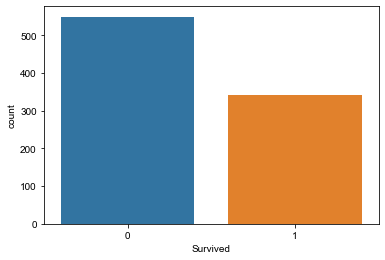

In [5]:
sns.countplot(x= 'Survived', data= train_data)
sns.set_style('whitegrid')

In [6]:
train_data.Survived.sum()

342

So only 342 people from the borading was survided when titanic ship was sunked!!

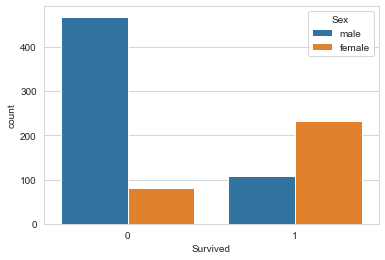

In [7]:
sns.countplot(x= 'Survived', hue= 'Sex', data= train_data)

So we can see that from total of around 890- passesnges the people who Survied were only 342 and from that around 200 of them were females!!

we can say that males are died more than the females, and we can also say that there was more couples out there who actualyy helped to save their females.. 

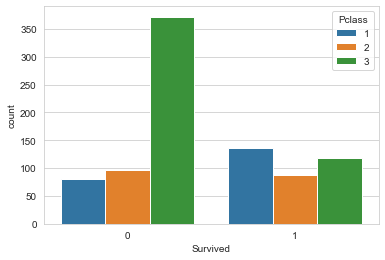

In [8]:
sns.countplot(x= 'Survived', hue= 'Pclass', data= train_data)

people who died were olstb from the 3 class passenger class. 


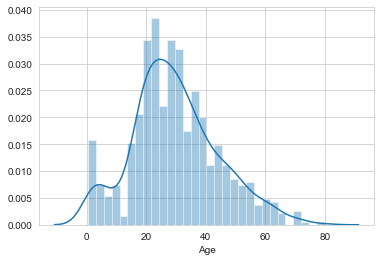

In [9]:
sns.distplot(train_data['Age'].dropna(), bins= 30, kde= 'False')

So from this graph we can say that there were more peopl;e of around 20-30 years of age.

around 180 out from the people data were adults.. so we can assume that adults are more excited to explore the world biggest ship of that time!!


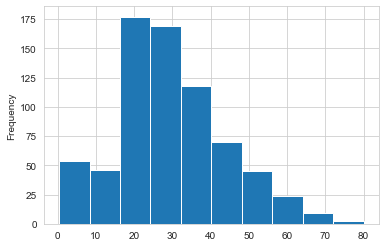

In [10]:
train_data['Age'].plot.hist()

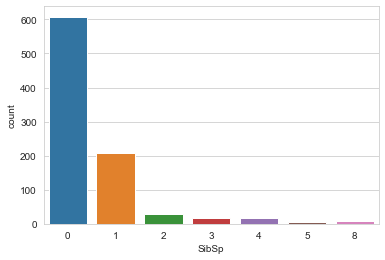

In [11]:
sns.countplot(x= 'SibSp', data= train_data)

So from the above graph we can conclude that there most of the people who were on Tigtanic ship were singles!!

and from there around 210 were engaged or have a partner!!

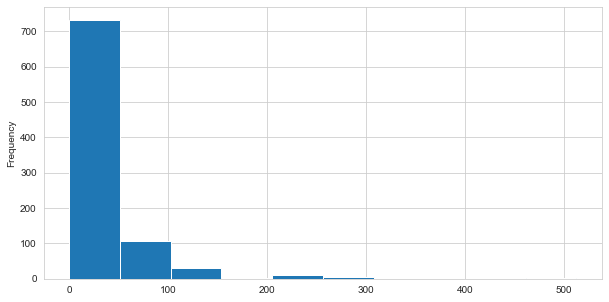

In [12]:
train_data.Fare.plot.hist(figsize= (10,5))

most of the people paid around 0-50 dollars for the ticket on borading the world famous ship pof that time!!. it was the reason why mostb of the people were from low class!!

In [13]:
train_data['Pclass'].value_counts()  

## among the 890 of people borading of th eship most of them were 3 class passengers!!

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [14]:
# import cufflinks as cf

In [15]:
# pip install cufflinks
# pip install chart_studio

In [16]:
# train_data['Fare'].iplot(kind= 'hist')

<Figure size 720x360 with 0 Axes>

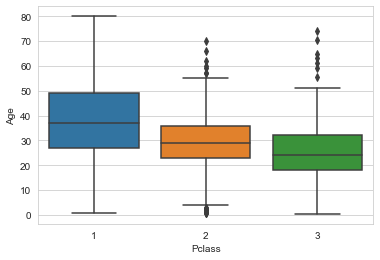

<Figure size 720x360 with 0 Axes>

In [17]:
sns.boxplot(x= 'Pclass', y= 'Age', data= train_data)
plt.figure(figsize=(10,5))

crating a function to fill the ,issing values of the age acording to the passeneger class

So now creating a class to make it more clear!!

In [18]:
def impute_age(cols):
    Age= cols[0]
    Pclass= cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37.5
        elif Pclass == 2:
            return 29
        else:
            return 25
    else:
        return Age

In [19]:
train_data['Age']= train_data[['Age', 'Pclass']].apply(impute_age, axis= 1)

In [20]:
train_data['Age'] == 27

0      False
1      False
2      False
3      False
4      False
       ...  
886     True
887    False
888    False
889    False
890    False
Name: Age, Length: 891, dtype: bool

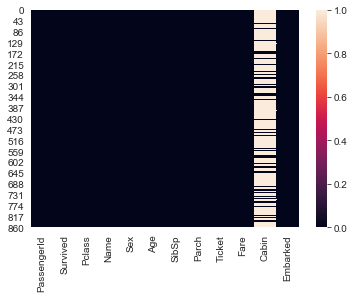

In [21]:
sns.heatmap(train_data.isnull())

In [22]:
train_data.drop('Cabin', axis=1, inplace = True)

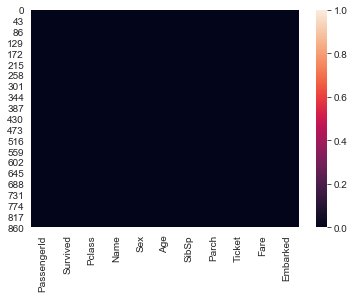

In [23]:
sns.heatmap(train_data.isnull())

In [24]:
train_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [25]:
train_data.dropna(inplace = True)

now create a dummy variables for computer to learn the codes better!!

In [26]:
pd.get_dummies(train_data['Sex'])

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [27]:
sex= pd.get_dummies(train_data['Sex'], drop_first= True)

In [28]:
embark= pd.get_dummies(train_data['Embarked'], drop_first= True)

In [29]:
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,25.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [30]:
train_data= pd.concat([train_data, sex, embark], axis = 1)


In [31]:
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,1,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,0,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,25.0,1,2,W./C. 6607,23.4500,S,0,0,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,1,0,0


In [34]:
train_data.drop(['Sex', 'Embarked', 'Name', 'Ticket'], axis= 1, inplace = True)

In [35]:
train_data

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000,1,0,1
887,888,1,1,19.0,0,0,30.0000,0,0,1
888,889,0,3,25.0,1,2,23.4500,0,0,1
889,890,1,1,26.0,0,0,30.0000,1,0,0


In [36]:
train_data.drop(['PassengerId'], axis=1, inplace= True)

In [37]:
train_data

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,1,0,1
887,1,1,19.0,0,0,30.0000,0,0,1
888,0,3,25.0,1,2,23.4500,0,0,1
889,1,1,26.0,0,0,30.0000,1,0,0


## model building!!

In [40]:
X= train_data.drop('Survived', axis=1)
Y= train_data['Survived']

In [43]:
X.head()

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3,22.0,1,0,7.2500,1,0,1
1,1,38.0,1,0,71.2833,0,0,0
2,3,26.0,0,0,7.9250,0,0,1
3,1,35.0,1,0,53.1000,0,0,1
4,3,35.0,0,0,8.0500,1,0,1


In [44]:
Y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [46]:
from sklearn.model_selection import train_test_split_split

In [47]:
X_train, X_test, Y_train, Y_test= train_test_split(X,Y, test_size=0.3, random_state= 101)

In [48]:
X_train

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
807,3,18.0,0,0,7.7750,0,0,1
651,2,18.0,0,1,23.0000,0,0,1
2,3,26.0,0,0,7.9250,0,0,1
690,1,31.0,1,0,57.0000,1,0,1
196,3,25.0,0,0,7.7500,1,1,0
...,...,...,...,...,...,...,...,...
576,2,34.0,0,0,13.0000,0,0,1
840,3,20.0,0,0,7.9250,1,0,1
338,3,45.0,0,0,8.0500,1,0,1
524,3,25.0,0,0,7.2292,1,0,0


In [49]:
X_test

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
511,3,25.0,0,0,8.05,1,0,1
613,3,25.0,0,0,7.75,1,1,0
615,2,24.0,1,2,65.00,0,0,1
337,1,41.0,0,0,134.50,0,0,0
718,3,25.0,0,0,15.50,1,1,0
...,...,...,...,...,...,...,...,...
792,3,25.0,8,2,69.55,0,0,1
828,3,25.0,0,0,7.75,1,1,0
732,2,29.0,0,0,0.00,1,0,1
669,1,37.5,1,0,52.00,0,0,1


In [50]:
Y_train

807    0
651    1
2      1
690    1
196    0
      ..
576    1
840    0
338    1
524    0
865    1
Name: Survived, Length: 622, dtype: int64

In [51]:
Y_test

511    0
613    0
615    1
337    1
718    0
      ..
792    0
828    1
732    0
669    1
634    0
Name: Survived, Length: 267, dtype: int64

In [52]:
from sklearn.linear_model import LogisticRegression

In [53]:
logmodel= LogisticRegression()

In [55]:
logmodel.fit(X_train, Y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

## predicting the model!!

In [57]:
predictions= logmodel.predict(X_test)

In [80]:
print(predictions)
print(predictions.shape)

[0 0 1 1 0 0 0 0 0 1 1 1 0 1 0 0 1 1 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1
 0 0 0 1 0 0 1 1 0 1 1 0 0 0 1 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 1 1
 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 1 0 0 0 1 1 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 0 1 0 0 1 1 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 1 0 1 1 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 1 0 0 1 0
 1 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 1 0
 0 0 1 0 0 1 0 0 1 0 0 0 1 1 1 0 1 0 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0
 1 1 0 0 0 0 1 1]
(267,)


In [67]:
Y_test.sum

<bound method Series.sum of 511    0
613    0
615    1
337    1
718    0
      ..
792    0
828    1
732    0
669    1
634    0
Name: Survived, Length: 267, dtype: int64>

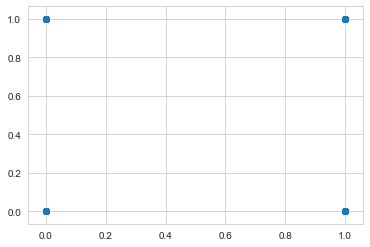

In [70]:
plt.scatter(x= Y_test, y= predictions)

In [71]:
from sklearn.metrics import classification_report

In [75]:
print(classification_report(Y_test, predictions))

              precision    recall  f1-score   support

           0       0.80      0.91      0.85       163
           1       0.82      0.65      0.73       104

    accuracy                           0.81       267
   macro avg       0.81      0.78      0.79       267
weighted avg       0.81      0.81      0.80       267



In [76]:
from sklearn.metrics import confusion_matrix

In [78]:
confusion_matrix(Y_test, predictions)

array([[148,  15],
       [ 36,  68]], dtype=int64)

so we can conclude that we get high precision from our model that we can predict the survived people who were boarded on the tittanic ship.